<a href="https://colab.research.google.com/github/Usuarioah03/Challenge-de-Modelado-de-datos-con-Python/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
productos = ['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina']
precios = [164300.0, 192300.0, 209600.0, 757500.0, 335200.0]
envios = [6900.0, 8400.0, 15900.0, 41000.0, 20200.0]

In [ ]:
totales = []
for i in range(len(productos)):
    total = precios[i] + envios[i]
    totales.append(total)

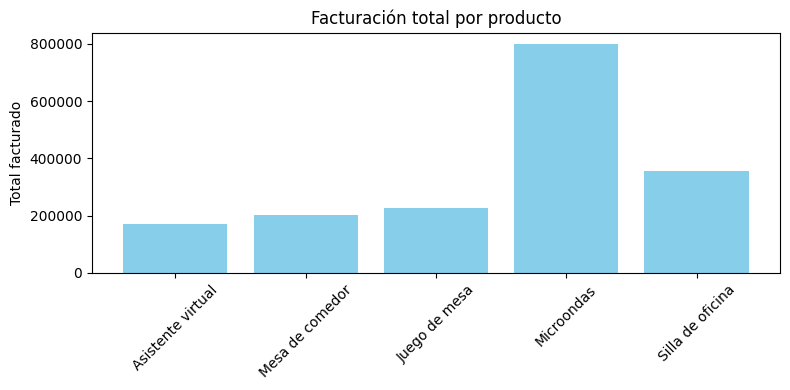

In [ ]:
def graficar_facturacion():
    plt.figure(figsize=(8, 4))
    plt.bar(productos, totales, color='skyblue')
    plt.title('Facturación total por producto')
    plt.ylabel('Total facturado')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

graficar_facturacion()

# 2. Ventas por categoría

In [ ]:
categorias = ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Muebles']


In [ ]:
ventas_categoria = {}
for i in range(len(productos)):
    categoria = categorias[i]
    if categoria in ventas_categoria:
        ventas_categoria[categoria] += precios[i]
    else:
        ventas_categoria[categoria] = precios[i]

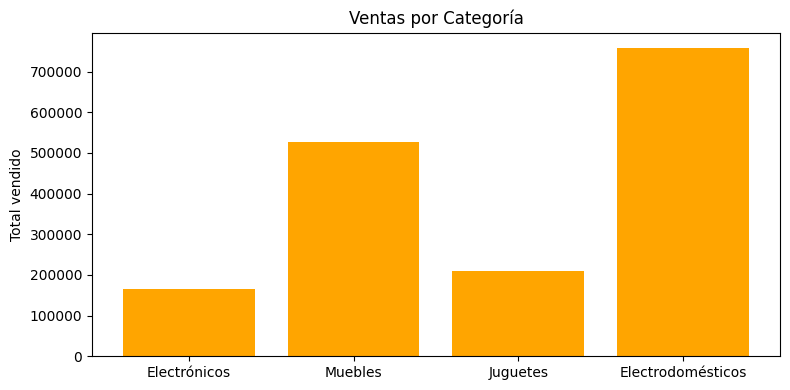

In [ ]:
def graficar_ventas_categoria():
    plt.figure(figsize=(8, 4))
    plt.bar(ventas_categoria.keys(), ventas_categoria.values(), color='orange')
    plt.title('Ventas por Categoría')
    plt.ylabel('Total vendido')
    plt.tight_layout()
    plt.show()

graficar_ventas_categoria()

# 3. Calificación promedio de la tienda


In [ ]:
calificaciones = [4, 1, 1, 4, 5]

In [ ]:
suma = 0
for c in calificaciones:
    suma += c
promedio = suma / len(calificaciones)

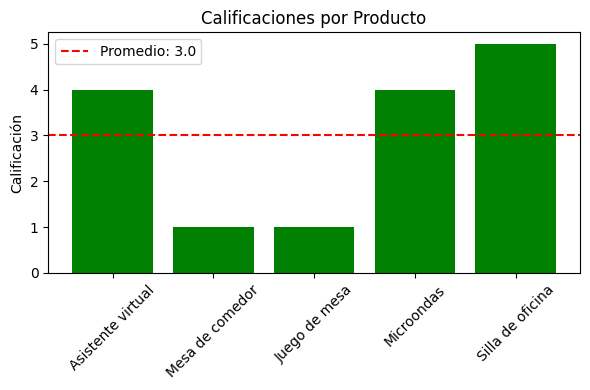

In [ ]:
def graficar_calificaciones():
    plt.figure(figsize=(6, 4))
    plt.bar(productos, calificaciones, color='green')
    plt.axhline(promedio, color='red', linestyle='--', label=f'Promedio: {promedio:.1f}')
    plt.title('Calificaciones por Producto')
    plt.ylabel('Calificación')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

graficar_calificaciones()

# 4. Productos más y menos vendidos

In [ ]:
productos_ordenados = []
precios_ordenados = []

In [ ]:
indices = list(range(len(productos)))
for i in range(len(indices)):
    for j in range(i+1, len(indices)):
        if precios[indices[i]] < precios[indices[j]]:
            indices[i], indices[j] = indices[j], indices[i]

for i in indices:
    productos_ordenados.append(productos[i])
    precios_ordenados.append(precios[i])


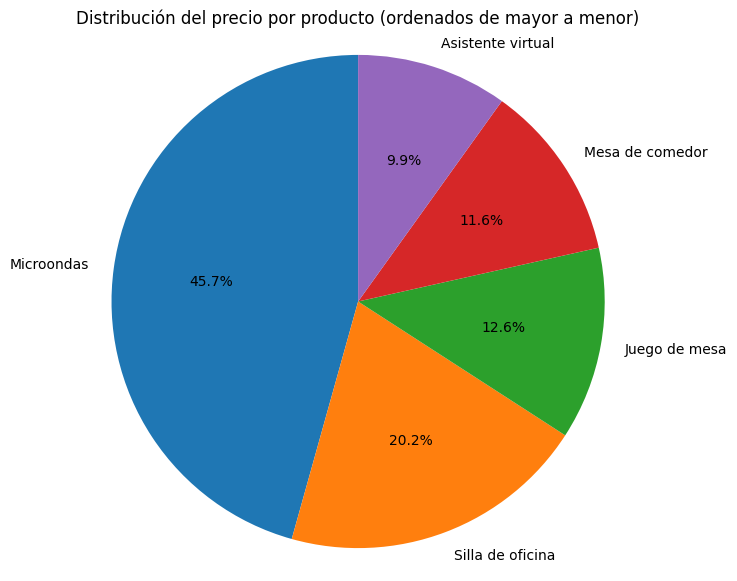

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(precios_ordenados, labels=productos_ordenados, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del precio por producto (ordenados de mayor a menor)')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.show()

# 5. Envío promedio por tienda

In [ ]:
vendedores = ['Pedro Gomez', 'Beatriz Morales', 'Juan Fernandez', 'Juan Fernandez', 'Maria Alfonso']


In [ ]:
envio_total = {}
contador = {}

In [ ]:
for i in range(len(productos)):
    vendedor = vendedores[i]
    if vendedor in envio_total:
        envio_total[vendedor] += envios[i]
        contador[vendedor] += 1
    else:
        envio_total[vendedor] = envios[i]
        contador[vendedor] = 1



In [ ]:
envio_promedio = {}
for vendedor in envio_total:
    envio_promedio[vendedor] = envio_total[vendedor] / contador[vendedor]

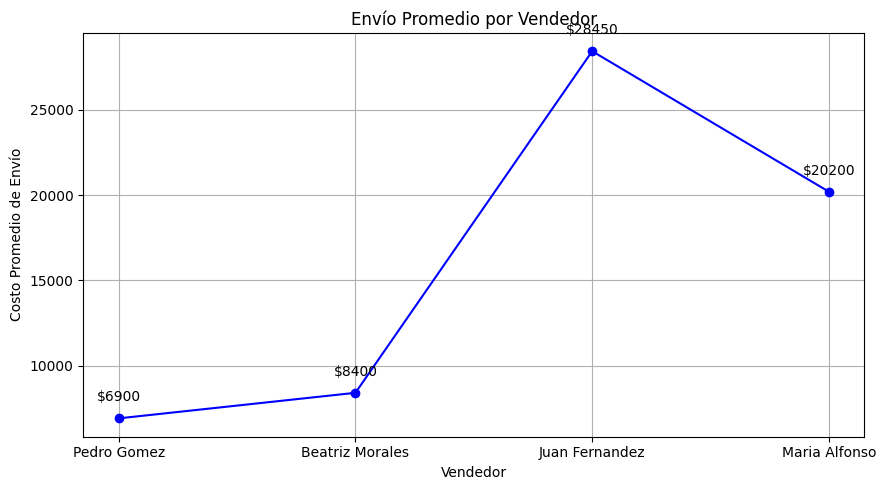

In [ ]:

nombres_vendedores = list(envio_promedio.keys())
valores_promedio = list(envio_promedio.values())


plt.figure(figsize=(9, 5))
plt.plot(nombres_vendedores, valores_promedio, marker='o', linestyle='-', color='blue')


for i, valor in enumerate(valores_promedio):
    plt.text(nombres_vendedores[i], valor + 1000, f"${valor:.0f}", ha='center')

plt.title("Envío Promedio por Vendedor")
plt.xlabel("Vendedor")
plt.ylabel("Costo Promedio de Envío")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

Las categorías de productos más y menos vendidas.

Las calificaciones promedio de los clientes por tienda.

Los productos más y menos vendidos.

El coste de envío promedio para cada tienda.

In [ ]:
Buenos dias Sr. Juan, luego de un extenso analicis sobre los datos de sus 5 (cinco) tiendas que nos paso. Me dirigo a usted para darle el informe final y asi en base a nuestros datos sacados usted pueda ver cual tienda es la que le esta generando mayores perdidas:
En ingreso totales podemos ver en la grafica que el producto "Microondas"  de la categoria "Electrodomesticos" presenta el mayor ingreso siendo el mismo de 800mil. Siendo "asistente virtual" el ultimo, en categoria observamos lo mismo, Electrodomesticos por encima de los demas productos y asistencia virtual posicionandose al final como un producto con pocas ventas.
En clasificaciones del producto por parte del usuario, podemos notar como los productos con mejores valoraciones son microondas,silla de oficina y asitente virtual, si bien el caso de asitente virtual cambia aqui posicionandolo como un producto bien valorado por el publico, en numero no refleja lo mismo, siendo este el que menos ingreso genera y el que poca demanda posee, en el siguiente grafico del punto numero cuatro (4) podemos observar como microondas ocupa un 45.7% de los productos ordenados,seguido de sillas de ofeicinas,juego de mesa ,mesa de comedor y por ultimo asistente virtual. En coste de envio de producto, asistencia virutal como ultimo, tambien suponiendo de como es el modelo de negocio, es normal que no gerene gastos en este aparto, y podemos vercomo se mantiene electrodomesticos con silla de oficina como de los top tanto en costo como en envio siendo los mas utilizados y pedidos.
Despues de todo este analicis podemos decir que la tienda de la cual puede precindir por temas de costo/beneficio es la de asitente virtual, esperamos a ver realizado una buena evaluacion y que no informe de cualquier duda que tenga, le deseamos un excelente dia